In [1]:
# Libraries
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import matplotlib
import pandas as pd

In [13]:
audio_p = '../data/english1.mp3'
data, sr = librosa.load(audio_p)

C:\Users\chris\miniconda3\envs\nlpEnv\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


C:\Users\chris\miniconda3\envs\nlpEnv\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


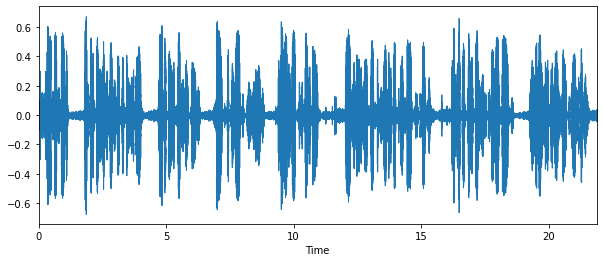

In [8]:
audio_p = '../data/english1.mp3'
data, sr = librosa.load(audio_p)
plt.figure(figsize=(10,4))
librosa.display.waveplot(data, sr)

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 30)
fig = plt.figure()
gs = fig.add_gridspec(7, 3, hspace=0, wspace=0)
ax = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Waves')
audios = [librosa.load(f'../data/spanish{i}.mp3') for i in range(1,11)]
for i in range(19):
    try:
        audios.append(librosa.load(f'../data/english{i}.mp3'))
    except:
        continue
c = 0
for i in range(len(ax)):
    if c == 20:
        break
    for j in range(len(ax[i])):
        if i == 2 and j == 6:
            continue
        z = np.nonzero(librosa.zero_crossings(audios[c][0]))
        print(z)
        ax[i, j].plot(audios[c][0])
        # ax[i, j].plot(z, 'ro')
        c += 1


C:\Users\chris\miniconda3\envs\nlpEnv\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
C:\Users\chris\miniconda3\envs\nlpEnv\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


C:\Users\chris\miniconda3\envs\nlpEnv\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


IndexError: list index out of range

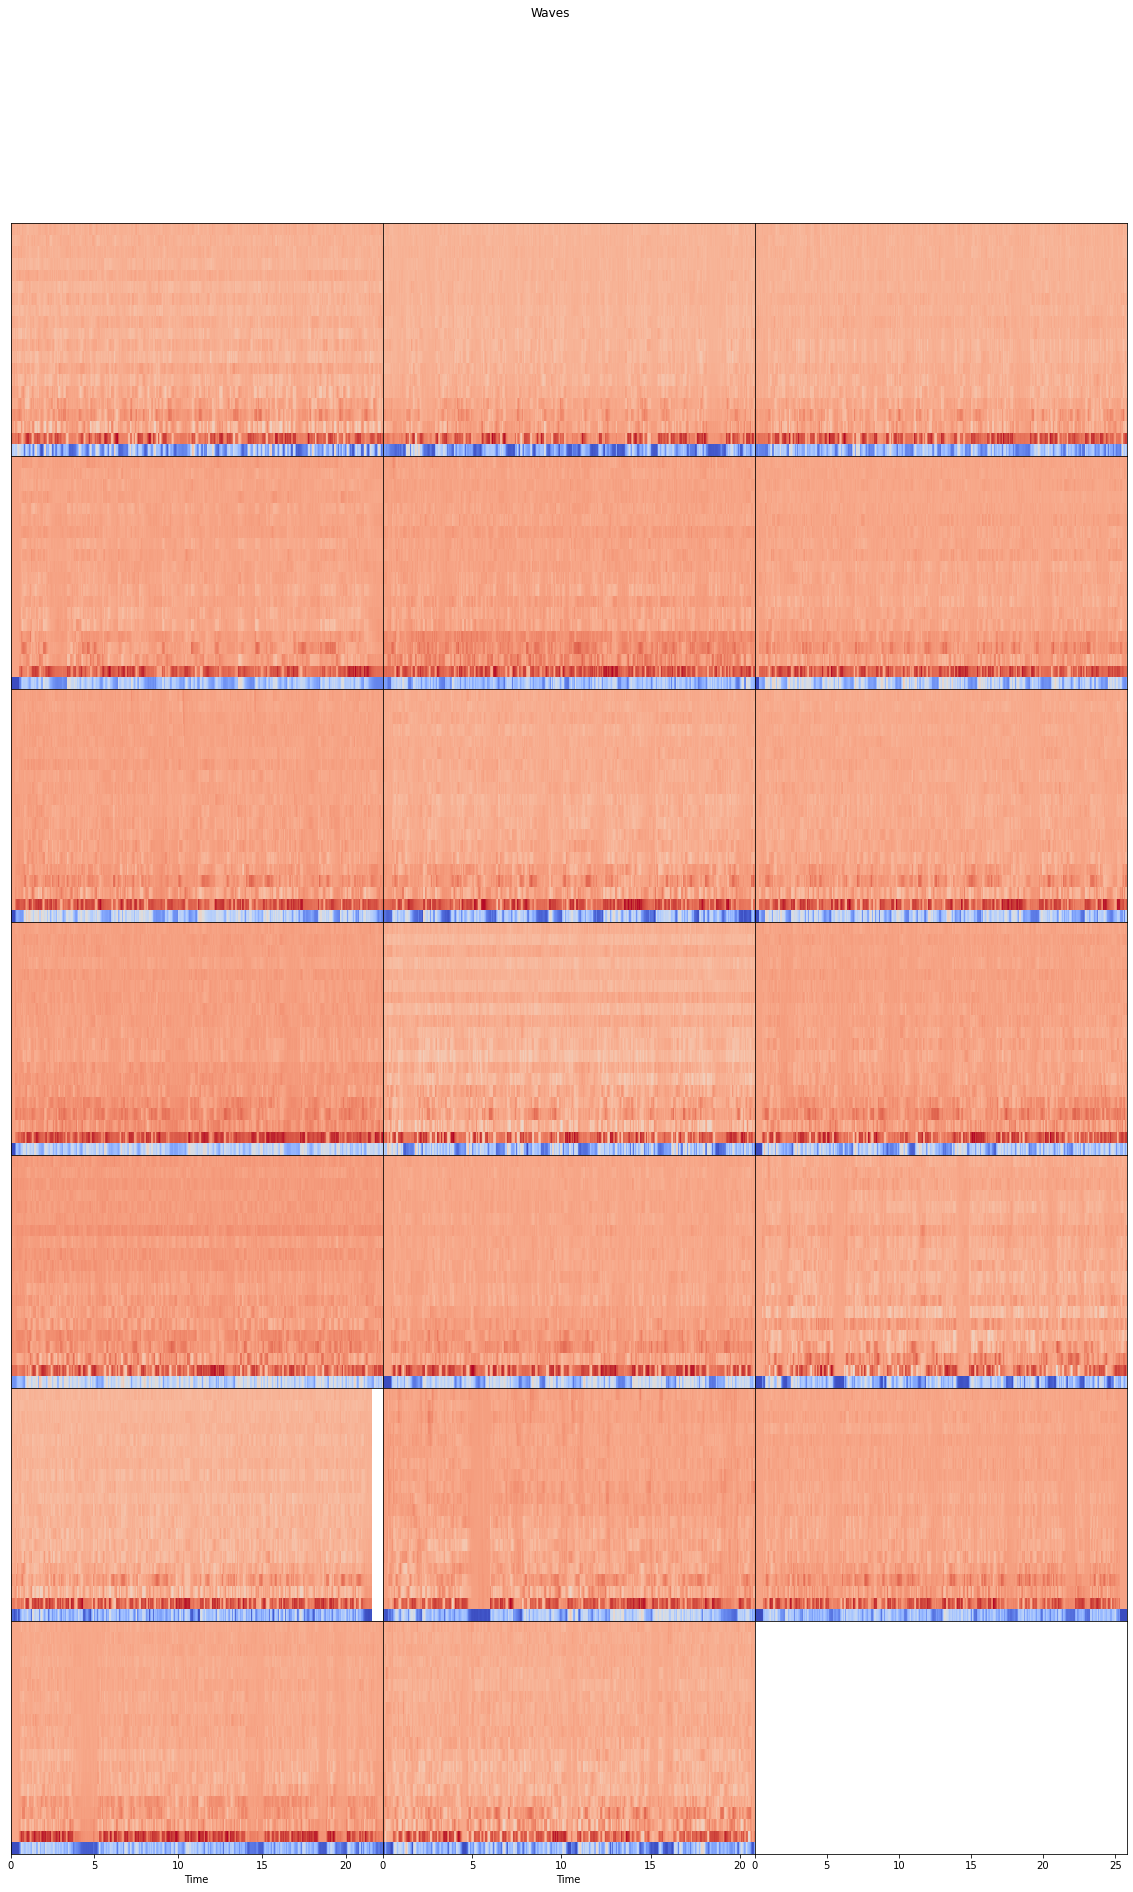

In [24]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 30)
fig = plt.figure()
gs = fig.add_gridspec(7, 3, hspace=0, wspace=0)
ax = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Waves')
audios = [librosa.load(f'../data/spanish{i}.mp3') for i in range(1,11)]
for i in range(19):
    try:
        audios.append(librosa.load(f'../data/english{i}.mp3'))
    except:
        continue

c = 0
for i in range(len(ax)):
    if c == 20:
        break
    for j in range(len(ax[i])):
        # ax[i, j].plot(audios[c][0][0:100])
        mfccs = librosa.feature.mfcc(audios[c][0], sr = audios[c][1])
        librosa.display.specshow(mfccs, sr=audios[c][1], x_axis='time', ax=ax[i,j])
        c += 1

In [20]:
librosa.get_duration(data)

21.87170068027211

In [24]:
librosa.amplitude_to_db(abs(data)).shape

(482271,)

In [5]:
datum, sr = librosa.load(f'../data/english/english1.mp3')

In [5]:
ipd.Audio(f'../data/english1.mp3')

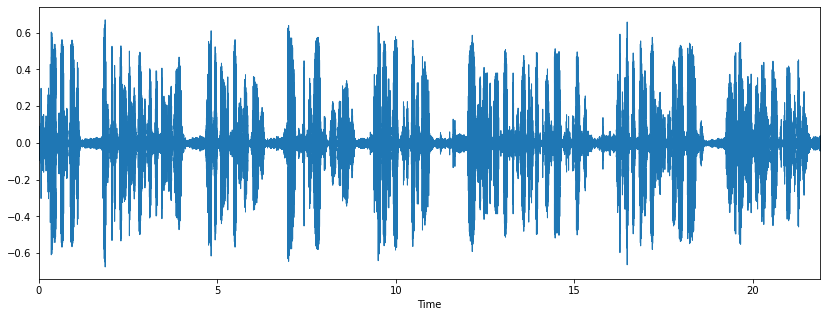

In [11]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(datum, sr=sr)

In [9]:
z = librosa.zero_crossings(datum)
sr

22050

In [28]:
nn = np.nonzero(z)

In [35]:
mm = librosa.feature.mfcc(datum, sr=2400, n_mfcc=13)
nn = librosa.feature.mfcc(datum, sr=2400, n_mfcc=39)

C:\Users\chris\miniconda3\envs\nlpEnv\lib\site-packages\librosa\util\utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(
C:\Users\chris\miniconda3\envs\nlpEnv\lib\site-packages\librosa\util\utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


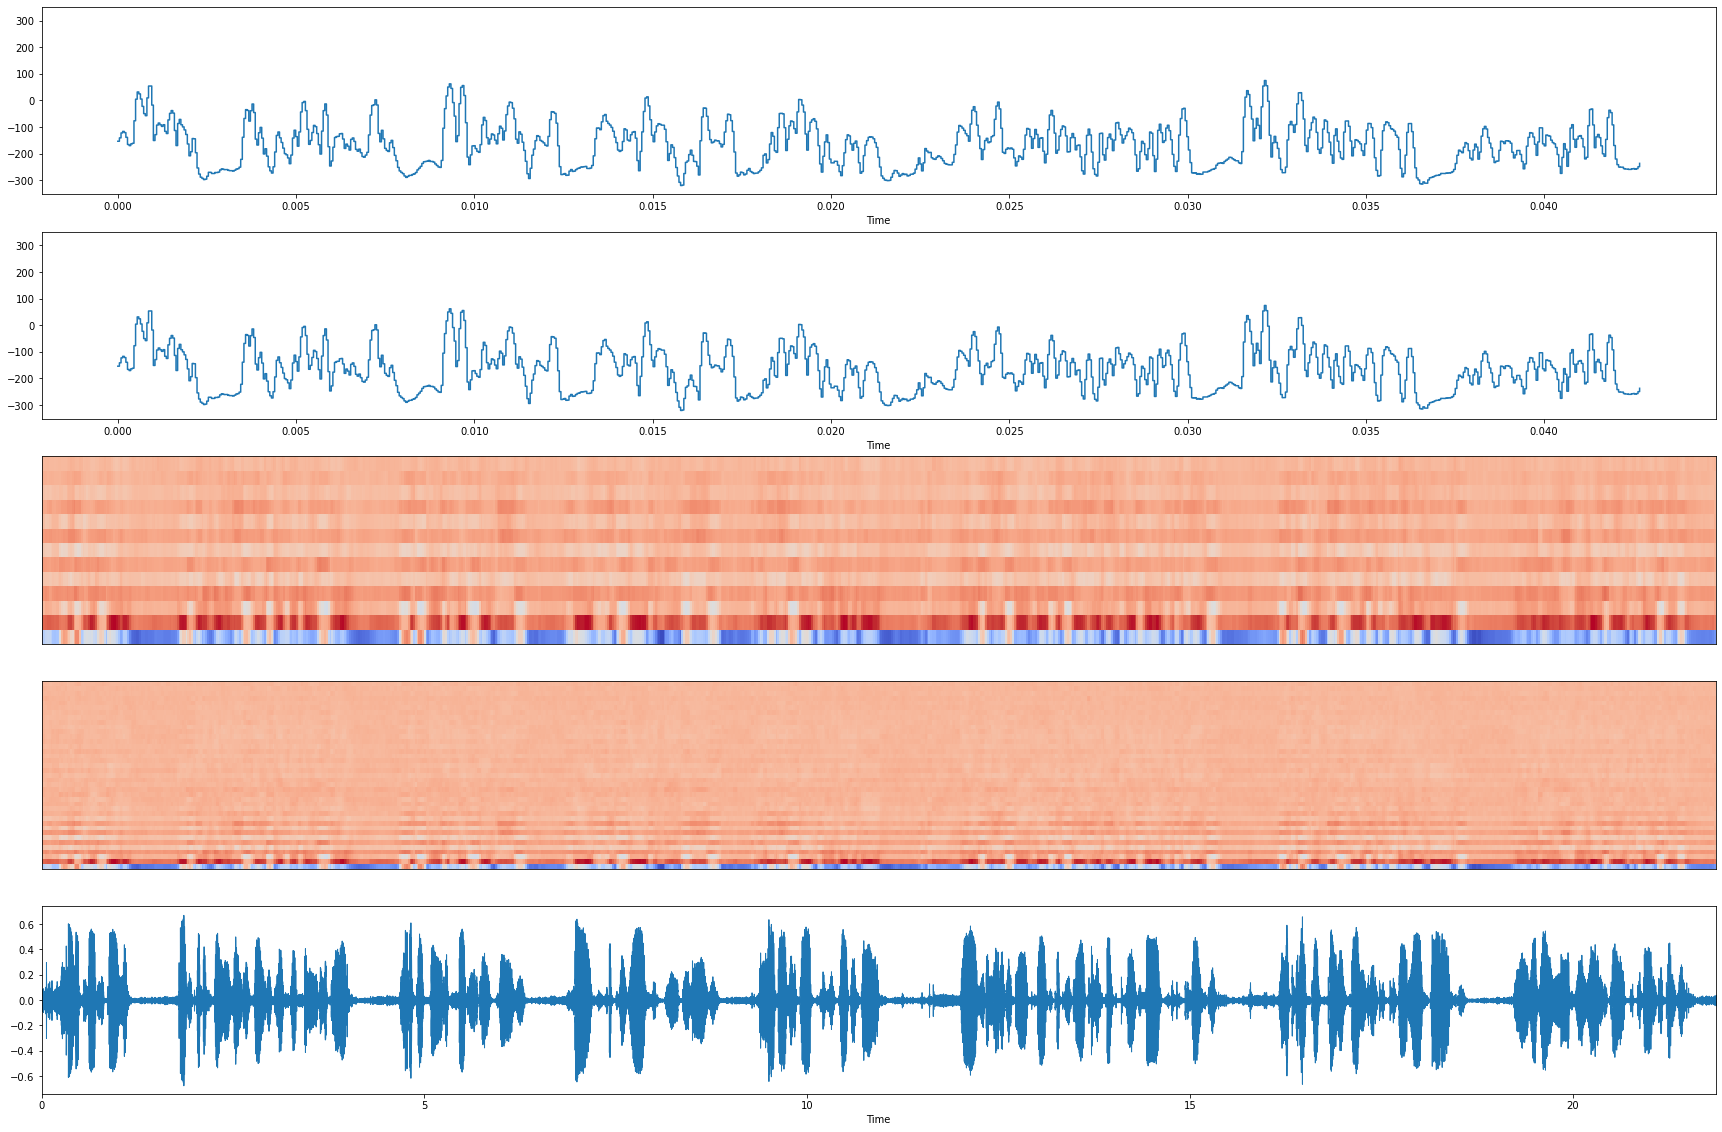

In [36]:
matplotlib.rcParams['figure.figsize'] = (30, 20)

fig, ax = plt.subplots(5)
librosa.display.waveshow(mm,sr=sr, ax=ax[0])
librosa.display.waveshow(nn, sr=sr, ax=ax[1])
librosa.display.specshow(mm, sr=sr, ax=ax[2])
librosa.display.specshow(nn, sr=sr, ax=ax[3])
librosa.display.waveplot(datum, sr=sr, ax=ax[4])


In [ ]:
plt.plot(nn[0])
for pos in nn[0]:
    print(pos)

In [63]:
nn[0][100:150]

array([ 900,  901,  942,  943,  947,  948,  949,  951,  970,  971, 1004,
       1006, 1065, 1066, 1067, 1071, 1074, 1078, 1081, 1082, 1083, 1112,
       1124, 1125, 1171, 1175, 1176, 1178, 1179, 1186, 1187, 1194, 1195,
       1196, 1198, 1205, 1208, 1209, 1242, 1249, 1256, 1269, 1280, 1284,
       1294, 1325, 1328, 1329, 1330, 1332], dtype=int64)

In [2]:
filename = '../data.csv'
df = pd.read_csv(filename)
file = '.' + df.loc[0, ['Audio']][0]


In [13]:
import features
dat = features.get_audio(file)
mfcc = features.to_mfcc(dat)
no_sil = features.remove_silence(dat)
less_mfcc = features.to_mfcc(no_sil)
# segs = features.segments(mfcc, 'spanish')

C:\Users\chris\miniconda3\envs\nlpEnv\lib\site-packages\librosa\util\utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(
C:\Users\chris\miniconda3\envs\nlpEnv\lib\site-packages\librosa\util\utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


(-500.0, 0.0)

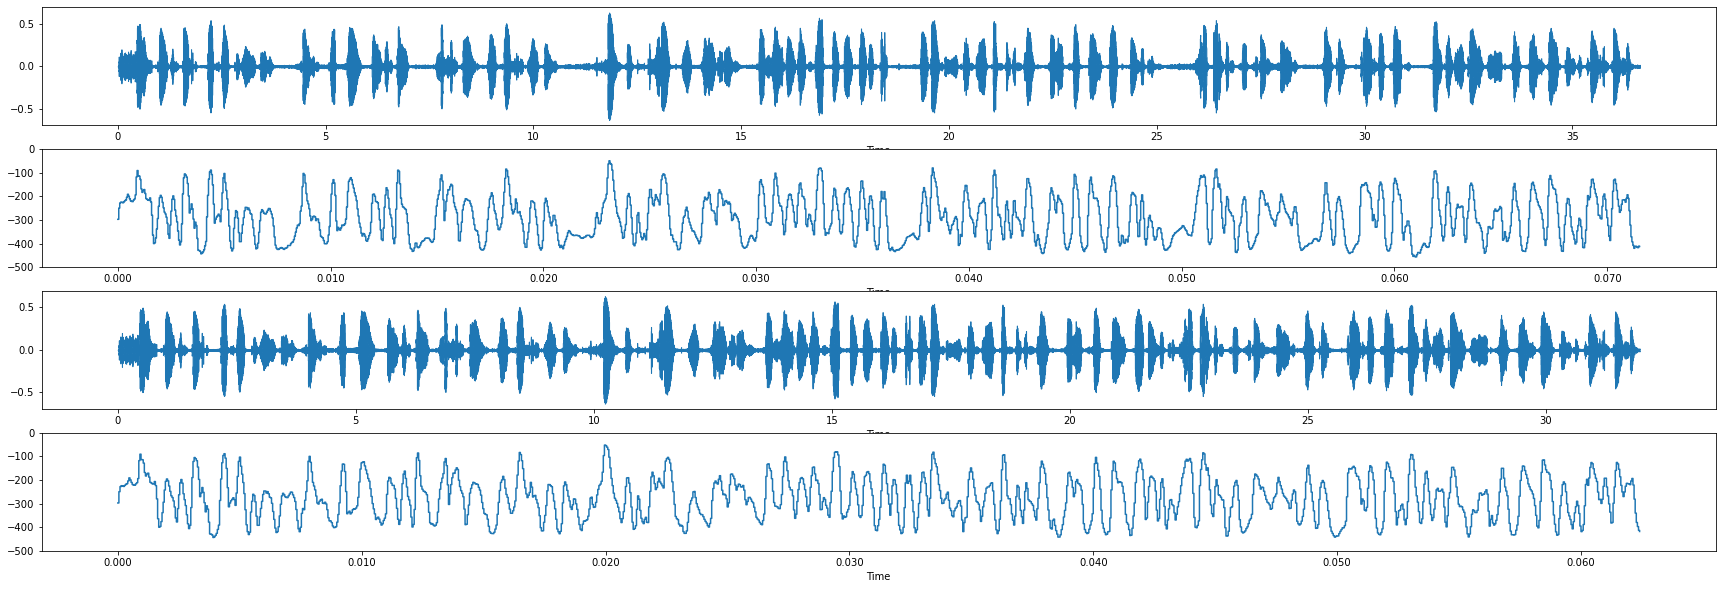

In [14]:
matplotlib.rcParams['figure.figsize'] = (30, 10)

fig, ax = plt.subplots(4)
librosa.display.waveshow(dat, ax=ax[0])
librosa.display.waveshow(mfcc, ax=ax[1])
librosa.display.waveshow(no_sil, ax=ax[2])
librosa.display.waveshow(less_mfcc, ax=ax[3])
ax[1].set_ylim([-500, 0])
ax[3].set_ylim([-500, 0])

In [12]:
mfcc.shape

(13, 1578)

In [15]:
less_mfcc.shape

(13, 1377)

In [16]:
input_x = 

IndexError: tuple index out of range

In [18]:
sklearn.model_selection.train_test_split()

,Unnamed: 0,Audio,features,subject,spanish,english,chinese,categorical
0,0,./data/spanish/spanish1.wav,NaN,spanish0,1,0,0,spanish
1,1,./data/spanish/spanish2.wav,NaN,spanish1,1,0,0,spanish
2,2,./data/spanish/spanish3.wav,NaN,spanish2,1,0,0,spanish
3,3,./data/spanish/spanish4.wav,NaN,spanish3,1,0,0,spanish
4,4,./data/spanish/spanish5.wav,NaN,spanish4,1,0,0,spanish
...,...,...,...,...,...,...,...,...
416,416,./data/english/english395.wav,NaN,english247,0,1,0,english
417,417,./data/english/english396.wav,NaN,english248,0,1,0,english
418,418,./data/english/english397.wav,NaN,english249,0,1,0,english
419,419,./data/english/english398.wav,NaN,english250,0,1,0,english
